In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cns
cns.go_offline()

In [2]:
### loading the dataset 

df = pd.read_csv('events.csv')

In [3]:
# understanding the data 

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [6]:
df.isnull()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
885124,False,False,False,False,True,True,False,False,False
885125,False,False,False,False,False,False,False,False,False
885126,False,False,False,False,False,False,False,False,False
885127,False,False,False,False,False,True,False,False,False


<Axes: >

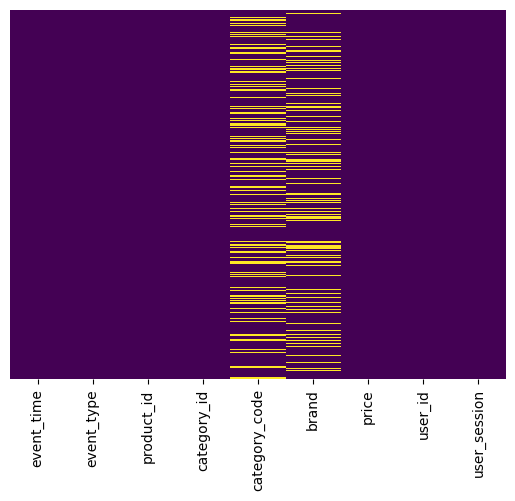

In [7]:
# eda process 

sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')  # to see null value in the data 

In [8]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [9]:
# handling the missing value 

df['category_code'].fillna('unknown',inplace=True)
df['brand'].fillna('unknown',inplace=True)
df.dropna(subset=['user_session'],inplace=True)       # droping all the row with missing user_session


In [10]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


<Axes: >

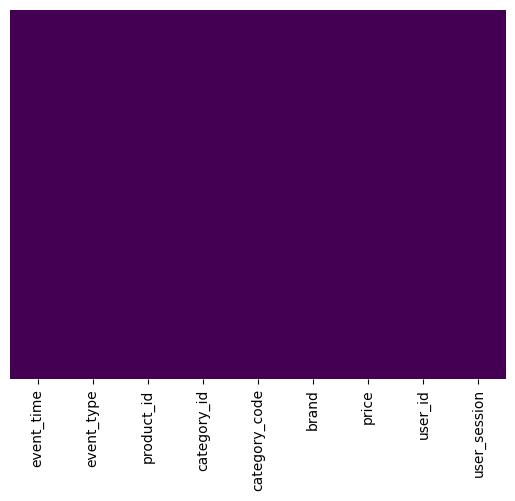

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# converting eventime column to datatime and extracting day and time 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884964 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     884964 non-null  object 
 1   event_type     884964 non-null  object 
 2   product_id     884964 non-null  int64  
 3   category_id    884964 non-null  int64  
 4   category_code  884964 non-null  object 
 5   brand          884964 non-null  object 
 6   price          884964 non-null  float64
 7   user_id        884964 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 67.5+ MB


In [13]:
df['event_time']=pd.to_datetime(df['event_time'])

In [14]:
df.info()     # converted to datetime

<class 'pandas.core.frame.DataFrame'>
Index: 884964 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     884964 non-null  datetime64[ns, UTC]
 1   event_type     884964 non-null  object             
 2   product_id     884964 non-null  int64              
 3   category_id    884964 non-null  int64              
 4   category_code  884964 non-null  object             
 5   brand          884964 non-null  object             
 6   price          884964 non-null  float64            
 7   user_id        884964 non-null  int64              
 8   user_session   884964 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 67.5+ MB


In [15]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [16]:
df['day']=df['event_time'].apply(lambda x:x.day)    # extracting days from event_time 

In [17]:
df['hours']=df['event_time'].apply(lambda x: x.hour)   # extracting hours from the event_time 

In [18]:
df['month']=df['event_time'].apply(lambda x: x.month)   # extracting month from the event_time 

In [19]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,hours,month
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,24,11,9
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,24,11,9
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,24,11,9
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,24,11,9
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,24,11,9


In [20]:
# eda process to visualize the data and know to more information about the product 


In [21]:
event_counts=df['event_type'].value_counts()
event_counts

event_type
view        793589
cart         54029
purchase     37346
Name: count, dtype: int64

Text(0.5, 1.0, 'Event distributions')

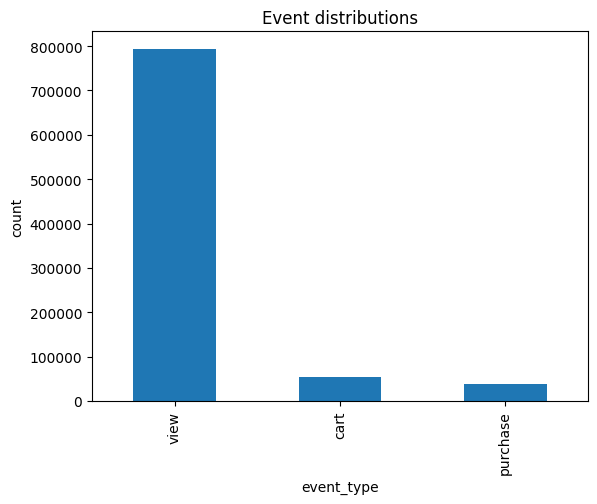

In [23]:
event_counts.plot(kind='bar')
plt.xlabel('event_type')
plt.ylabel('count')
plt.title('Event distributions')

In [29]:
# 	Brand and category popularity
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,hours,month
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,24,11,9
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,24,11,9
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,24,11,9
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,24,11,9
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,24,11,9


In [25]:
popular_brand = df['brand'].value_counts().head(10)
popular_brand

brand
unknown      212326
asus          27703
gigabyte      27673
msi           24876
palit         24801
samsung       23198
amd           20107
canon         18437
panasonic     11986
pioneer       11467
Name: count, dtype: int64

In [31]:
df['brand'].replace('unknown','LG',inplace=True)          # converting unknown brand to name to LG TO MAKE IT look good 

<Axes: xlabel='brand'>

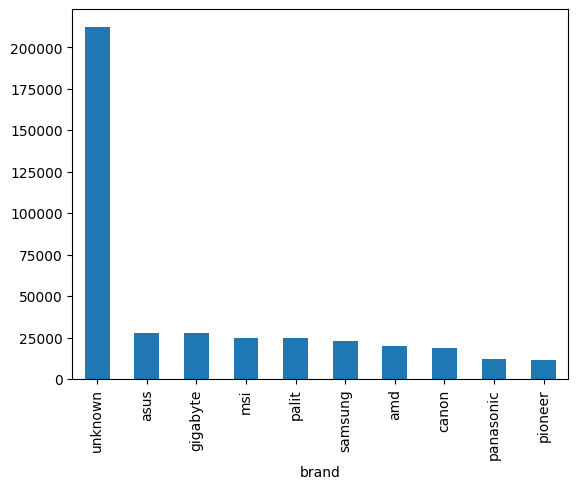

In [26]:
popular_brand.plot(kind='bar')

In [33]:
# User-level summaries (total spend, frequency of visits, time between visits, etc.).

user_summarys= df.groupby('user_id').agg(total_event=('event_type','count'),total_price=('price','sum')).reset_index().head(5)
user_summarys.head(5)

,user_id,total_event,total_price
0,1515915625353226922,1,76.48
1,1515915625353230067,1,28.98
2,1515915625353230683,13,814.93
3,1515915625353230922,1,274.40
4,1515915625353234047,36,5481.90


In [34]:
# 4 4.	Defining Churn
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,hours,month
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,LG,31.90,1515915625519388267,LJuJVLEjPT,24,11,9
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,24,11,9
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,LG,9.81,1515915625513238515,4TMArHtXQy,24,11,9
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,24,11,9
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,24,11,9


In [35]:
last_event=df.groupby('user_id')['event_time'].max().reset_index()
last_event         # seeing the last day of user to do something

,user_id,event_time
0,1515915625353226922,2020-10-29 11:28:35+00:00
1,1515915625353230067,2020-10-06 06:30:32+00:00
2,1515915625353230683,2020-12-12 10:33:09+00:00
3,1515915625353230922,2020-10-02 08:23:40+00:00
4,1515915625353234047,2021-02-18 09:11:44+00:00
...,...,...
407232,1515915625611023671,2021-02-28 23:54:18+00:00
407233,1515915625611023730,2021-02-28 23:55:01+00:00
407234,1515915625611024014,2021-02-28 23:58:05+00:00
407235,1515915625611024020,2021-02-28 23:58:09+00:00


In [36]:
last_event['event_time']=pd.to_datetime(last_event['event_time'],)    # converting to timestamp for substracting to real time senario

In [37]:
# 'event_time' is timezone-naive
last_event['event_time'] = last_event['event_time'].dt.tz_localize(None)     # converting to see to current time data to see diffrence from current date to last use 

last_event['days_since_last_event'] = (pd.Timestamp.now().tz_localize(None) - last_event['event_time']).dt.days                    


In [38]:
last_event.head()           

,user_id,event_time,days_since_last_event
0,1515915625353226922,2020-10-29 11:28:35,1522
1,1515915625353230067,2020-10-06 06:30:32,1545
2,1515915625353230683,2020-12-12 10:33:09,1478
3,1515915625353230922,2020-10-02 08:23:40,1549
4,1515915625353234047,2021-02-18 09:11:44,1410


In [60]:

#####      5.	Feature Engineering


In [65]:

# 1. Recency: Days since the user's last activity
latest_date = df['event_time'].max()
df['recency'] = (latest_date - df['event_time']).dt.days
df['recency'].head()

0    157
1    157
2    157
3    157
4    157
Name: recency, dtype: int64

In [66]:

# 2. frequency: Measure how active the user has been
frequency = df.groupby('user_id')['event_type'].count().reset_index()
frequency.columns = ['user_id', 'frequency']
frequency[frequency['frequency']>5].head()           # to see user with maximum number of frequency

,user_id,frequency
2,1515915625353230683,13
4,1515915625353234047,36
9,1515915625353286099,11
10,1515915625353294441,97
14,1515915625353411684,33


In [54]:

# 3. Session Count: Users with fewer sessions might be less engaged.
session_count = df.groupby('user_id')['user_session'].nunique().reset_index()
session_count.columns = ['user_id', 'session_count']
session_count.head()                      # hence we can see index 3 has more view so we can focus more over there 

,user_id,session_count
0,1515915625353226922,1
1,1515915625353230067,1
2,1515915625353230683,4
3,1515915625353230922,1
4,1515915625353234047,1


In [53]:

# 4. Monetary Value: High-spending users are more likely to stay engaged.
monetary = df.groupby('user_id')['price'].sum().reset_index()
monetary.columns = ['user_id', 'monetary_value']
monetary.head()

,user_id,monetary_value
0,1515915625353226922,76.48
1,1515915625353230067,28.98
2,1515915625353230683,814.93
3,1515915625353230922,274.40
4,1515915625353234047,5481.90


In [50]:

# 5. View-to-Cart Ratio:  to see how much user view and add to cart it is important for modeling
view_cart = df.pivot_table(index='user_id', columns='event_type', values='event_time', aggfunc='count').fillna(0)
view_cart['view_to_cart_ratio'] = view_cart['view'] / (view_cart['cart'] + 1)  # Avoid division by zero
view_cart.head()

event_type,cart,purchase,view,view_to_cart_ratio
user_id,,,,
1515915625353226922,0.0,0.0,1.0,1.0
1515915625353230067,0.0,0.0,1.0,1.0
1515915625353230683,0.0,0.0,13.0,13.0
1515915625353230922,0.0,0.0,1.0,1.0
1515915625353234047,0.0,0.0,36.0,36.0


In [47]:

# 6. Cart-to-Purchase Ratio: Carts compared to purchases
view_cart['cart_to_purchase_ratio'] = view_cart['cart'] / (view_cart['purchase'] + 1)
view_cart.head()

event_type,cart,purchase,view,view_to_cart_ratio,cart_to_purchase_ratio
user_id,,,,,
1515915625353226922,0.0,0.0,1.0,1.0,0.0
1515915625353230067,0.0,0.0,1.0,1.0,0.0
1515915625353230683,0.0,0.0,13.0,13.0,0.0
1515915625353230922,0.0,0.0,1.0,1.0,0.0
1515915625353234047,0.0,0.0,36.0,36.0,0.0


In [43]:

# Combine all features into one dataframe
features = frequency.merge(session_count, on='user_id', how='left')
features = features.merge(monetary, on='user_id', how='left')
features = features.merge(view_cart[['view_to_cart_ratio', 'cart_to_purchase_ratio']], on='user_id', how='left')

print("Feature engineering completed! Features saved to 'user_features.csv'.")

Feature engineering completed! Features saved to 'user_features.csv'.


In [80]:
print('final report ')
features.head()

final report 


,user_id,frequency,session_count,monetary_value,view_to_cart_ratio,cart_to_purchase_ratio,last_active_day
0,1515915625353226922,1,1,76.48,1.0,0.0,2020-10-29 11:28:35+00:00
1,1515915625353230067,1,1,28.98,1.0,0.0,2020-10-06 06:30:32+00:00
2,1515915625353230683,13,4,814.93,13.0,0.0,2020-12-12 10:33:09+00:00
3,1515915625353230922,1,1,274.40,1.0,0.0,2020-10-02 08:23:40+00:00
4,1515915625353234047,36,1,5481.90,36.0,0.0,2021-02-18 09:11:44+00:00


In [77]:

last_active_dates = df.groupby('user_id')['event_time'].max().reset_index()    #seeing max last date the user was active in any event 
last_active_dates.rename(columns={'event_time': 'last_active_day'}, inplace=True)

# Merge this information into the features DataFrame
features = features.merge(last_active_dates, on='user_id', how='left')

In [78]:
features.head()

,user_id,frequency,session_count,monetary_value,view_to_cart_ratio,cart_to_purchase_ratio,last_active_day
0,1515915625353226922,1,1,76.48,1.0,0.0,2020-10-29 11:28:35+00:00
1,1515915625353230067,1,1,28.98,1.0,0.0,2020-10-06 06:30:32+00:00
2,1515915625353230683,13,4,814.93,13.0,0.0,2020-12-12 10:33:09+00:00
3,1515915625353230922,1,1,274.40,1.0,0.0,2020-10-02 08:23:40+00:00
4,1515915625353234047,36,1,5481.90,36.0,0.0,2021-02-18 09:11:44+00:00


In [84]:
from datetime import timedelta


features['last_active_day'] = pd.to_datetime(features['last_active_day'])

# Calculate churn threshold: 30 days before the most recent event time
churn_threshold = df['event_time'].max() - timedelta(days=30)

# Create the churned feature
features['churned'] = features['last_active_day'].apply(lambda x: 1 if x < churn_threshold else 0)

# Check the resulting features DataFrame
print(features[['user_id', 'last_active_day', 'churned']])

                    user_id           last_active_day  churned
0       1515915625353226922 2020-10-29 11:28:35+00:00        1
1       1515915625353230067 2020-10-06 06:30:32+00:00        1
2       1515915625353230683 2020-12-12 10:33:09+00:00        1
3       1515915625353230922 2020-10-02 08:23:40+00:00        1
4       1515915625353234047 2021-02-18 09:11:44+00:00        0
...                     ...                       ...      ...
407232  1515915625611023671 2021-02-28 23:54:18+00:00        0
407233  1515915625611023730 2021-02-28 23:55:01+00:00        0
407234  1515915625611024014 2021-02-28 23:58:05+00:00        0
407235  1515915625611024020 2021-02-28 23:58:09+00:00        0
407236  1515915625611024030 2021-02-28 23:58:14+00:00        0

[407237 rows x 3 columns]


In [85]:
## building a random forest model for data frame 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [111]:
x=features.drop(['user_id','churned','last_active_day'],axis=1)
y=features['churned']


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [110]:
model=RandomForestClassifier()

In [93]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
prediction= model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))
print('AUC-ROC:', metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.31      0.11      0.16     26349
           1       0.81      0.94      0.87    108040

    accuracy                           0.78    134389
   macro avg       0.56      0.52      0.52    134389
weighted avg       0.71      0.78      0.73    134389

[[  2778  23571]
 [  6085 101955]]
roc_score:0.524554606727184
AUC-ROC: 0.5670044525153204


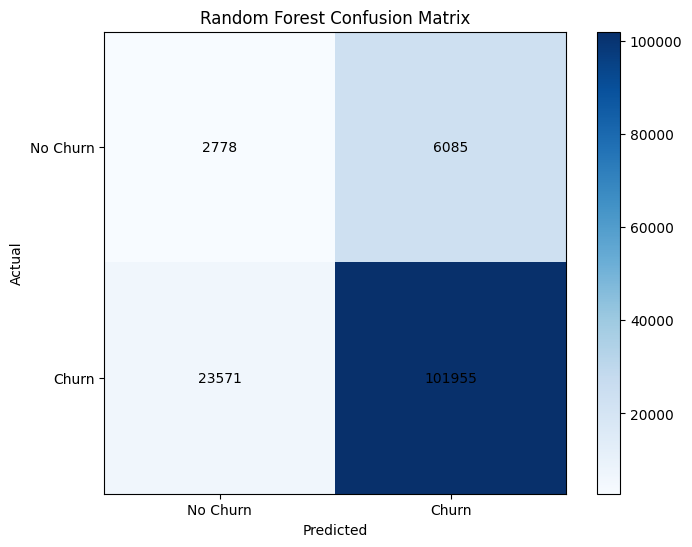

In [151]:
cm_rf =metrics .confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, cmap='Blues', interpolation='nearest')
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])
plt.text(0, 0, cm_rf[0, 0], ha='center', va='center')
plt.text(0, 1, cm_rf[0, 1], ha='center', va='center')
plt.text(1, 0, cm_rf[1, 0], ha='center', va='center')
plt.text(1, 1, cm_rf[1, 1], ha='center', va='center')
plt.show()

In [101]:
# using logistic regression 


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [106]:
models= LogisticRegression()

In [117]:
models.fit(x_train,y_train)

LogisticRegression()

In [118]:
predict=models.predict(x_test)

In [126]:
prob=models.predict_proba(x_test)[:, 1]

In [120]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.47      0.00      0.01     26349
           1       0.80      1.00      0.89    108040

    accuracy                           0.80    134389
   macro avg       0.64      0.50      0.45    134389
weighted avg       0.74      0.80      0.72    134389



In [121]:
# hence from above report we are getting better recall in logistic regression 

In [123]:
print(metrics.confusion_matrix(y_test,predict))     # hence also better confuision metrics

[[    88  26261]
 [    99 107941]]


In [127]:
print("AUC-ROC:", metrics.roc_auc_score(y_test, prob))

AUC-ROC: 0.5412077936171024


In [128]:
import numpy as np

In [137]:
coefficients=models.coef_[0]

In [138]:
coeffiecnt=pd.DataFrame({'Feature': x.columns,'Coefficient': coefficients})

In [141]:
coeffiecnt

,Feature,Coefficient
0,frequency,0.008760
1,session_count,-0.055763
2,monetary_value,-0.000100
3,view_to_cart_ratio,-0.008760
4,cart_to_purchase_ratio,-0.083584


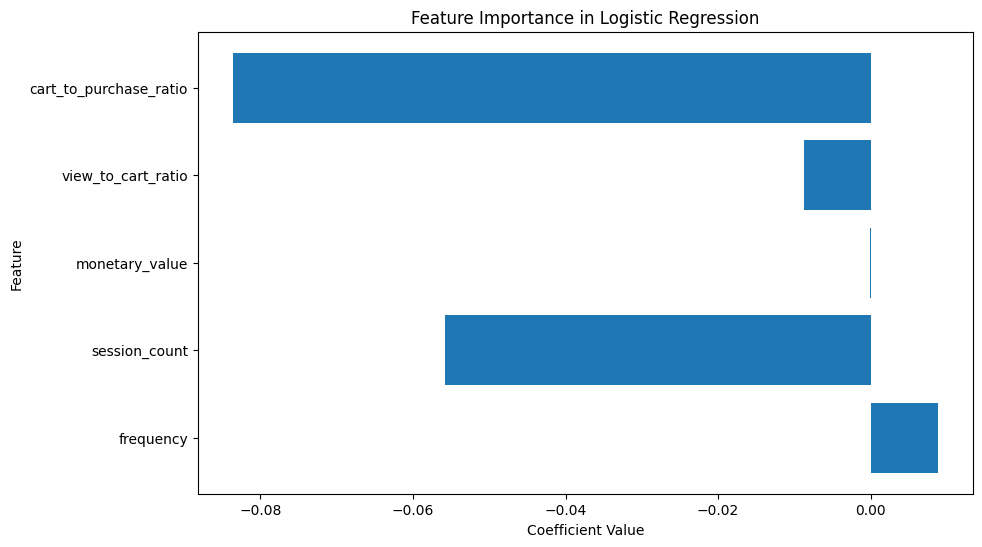

In [ ]:

# Ploting the  feature importance bar graph 
plt.figure(figsize=(10, 6))
plt.barh(coeffiecnt['Feature'], coeffiecnt['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

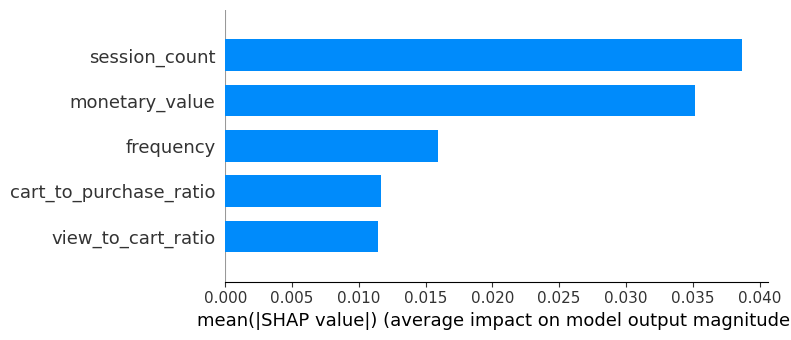

In [156]:
# SHAP Analysis for logistic regresiion

import shap
explainer = shap.LinearExplainer(models,x_train)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

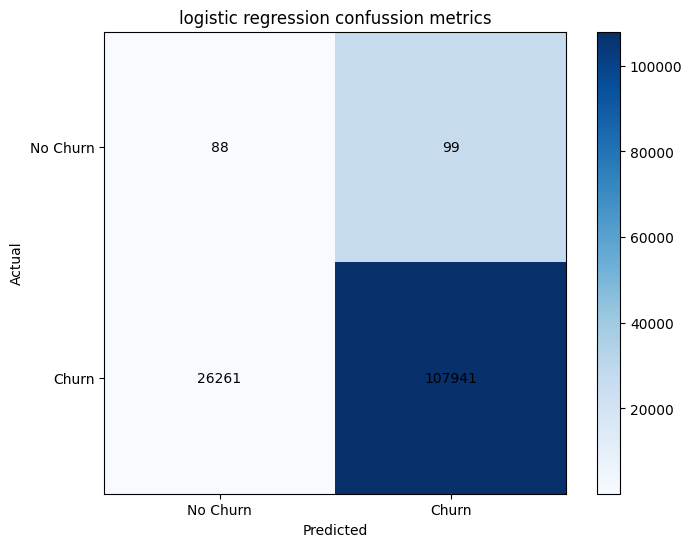

In [ ]:
cm_lr = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, cmap='Blues', interpolation='nearest')
plt.title('logistic regression confussion metrics')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])
plt.text(0, 0, cm_rf[0, 0], ha='center', va='center')
plt.text(0, 1, cm_rf[0, 1], ha='center', va='center')
plt.text(1, 0, cm_rf[1, 0], ha='center', va='center')
plt.text(1, 1, cm_rf[1, 1], ha='center', va='center')
plt.show()

In [153]:
recommendations = """ 1. By analyzing feature importance from both Logistic Regression and Random Forest models, I identified key drivers of churn, such as users with lower purchase counts and reduced total spend.
2. To address this, targeted marketing campaigns can be designed to re-engage users who exhibit early signs of churn, like those with high event activity but no purchases.
3. Offering loyalty programs or providing special discounts could encourage at-risk users to make purchases and improve retention.
4. Regular monitoring of user activity is essential, and the churn threshold (e.g., 30 days) should be adjusted to reflect changing business needs and user behavior.
5. Personalized product recommendations and incentive-based strategies can also help retain users by aligning with their preferences.
6. SHAP values and partial dependence plots are extremely helpful in understanding feature contributions, enabling the creation of effective, actionable strategies for reducing churn.
"""
print("Recommendations & Conclusions:\n", recommendations)


Recommendations & Conclusions:
  1. By analyzing feature importance from both Logistic Regression and Random Forest models, I identified key drivers of churn, such as users with lower purchase counts and reduced total spend.
2. To address this, targeted marketing campaigns can be designed to re-engage users who exhibit early signs of churn, like those with high event activity but no purchases.
3. Offering loyalty programs or providing special discounts could encourage at-risk users to make purchases and improve retention.
4. Regular monitoring of user activity is essential, and the churn threshold (e.g., 30 days) should be adjusted to reflect changing business needs and user behavior.
5. Personalized product recommendations and incentive-based strategies can also help retain users by aligning with their preferences.
6. SHAP values and partial dependence plots are extremely helpful in understanding feature contributions, enabling the creation of effective, actionable strategies for redu

In [155]:

print('thanku for giving me this task')

thanku for giving me this task
